# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# URL Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Countter
count = 0

print("Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        count = count + 1;
        
        # Print city output
        print(f"Processing Record {count} | {city_record}")
        print(f"{url}&q={city}")
        
        # time to wait 
        time.sleep(1.1)
 
        
    # City Not Found
    except KeyError:
        
        print("City not found")

print("Data Retrieval Complete")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?&q=vila franca do campo
Processing Record 2 | Lam Luk Ka
http://api.openweathermap.org/data/2.5/weather?&q=lam luk ka
City not found
Processing Record 3 | Tazovskiy
http://api.openweathermap.org/data/2.5/weather?&q=tazovskiy
Processing Record 4 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?&q=broken hill
Processing Record 5 | Kavieng
http://api.openweathermap.org/data/2.5/weather?&q=kavieng
City not found
Processing Record 6 | Dingle
http://api.openweathermap.org/data/2.5/weather?&q=dingle
Processing Record 7 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?&q=puerto ayora
Processing Record 8 | Padang
http://api.openweathermap.org/data/2.5/weather?&q=padang
Processing Record 9 | Havre
http://api.openweathermap.org/data/2.5/weather?&q=havre
Processing Record 10 | Lorengau
http://api.openweathermap.org/data/2.5/weat

Processing Record 87 | Velen
http://api.openweathermap.org/data/2.5/weather?&q=velen
City not found
City not found
Processing Record 88 | Viedma
http://api.openweathermap.org/data/2.5/weather?&q=viedma
Processing Record 89 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?&q=qaanaaq
Processing Record 90 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?&q=ixtapa
Processing Record 91 | Kaeo
http://api.openweathermap.org/data/2.5/weather?&q=kaeo
City not found
Processing Record 92 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?&q=port hedland
Processing Record 93 | Mehamn
http://api.openweathermap.org/data/2.5/weather?&q=mehamn
Processing Record 94 | San Lazaro
http://api.openweathermap.org/data/2.5/weather?&q=san lazaro
Processing Record 95 | Kapaa
http://api.openweathermap.org/data/2.5/weather?&q=kapaa
Processing Record 96 | Tiksi
http://api.openweathermap.org/data/2.5/weather?&q=tiksi
Processing Record 97 | Codrington
http://api.openweathermap.org/data/2.5/

Processing Record 174 | Khatanga
http://api.openweathermap.org/data/2.5/weather?&q=khatanga
City not found
Processing Record 175 | Souillac
http://api.openweathermap.org/data/2.5/weather?&q=souillac
Processing Record 176 | Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?&q=marsa matruh
City not found
City not found
Processing Record 177 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?&q=ponta do sol
City not found
Processing Record 178 | Leh
http://api.openweathermap.org/data/2.5/weather?&q=leh
Processing Record 179 | Anloga
http://api.openweathermap.org/data/2.5/weather?&q=anloga
Processing Record 180 | Middletown
http://api.openweathermap.org/data/2.5/weather?&q=middletown
Processing Record 181 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?&q=port hardy
Processing Record 182 | Plouzane
http://api.openweathermap.org/data/2.5/weather?&q=plouzane
Processing Record 183 | Tecoanapa
http://api.openweathermap.org/data/2.5/weather?&q=tecoanapa
Processi

Processing Record 263 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?&q=puerto escondido
City not found
Processing Record 264 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?&q=saint-augustin
Processing Record 265 | Santiago
http://api.openweathermap.org/data/2.5/weather?&q=santiago
City not found
Processing Record 266 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?&q=carnarvon
Processing Record 267 | La Palma del Condado
http://api.openweathermap.org/data/2.5/weather?&q=la palma del condado
Processing Record 268 | Royan
http://api.openweathermap.org/data/2.5/weather?&q=royan
Processing Record 269 | Virginia Beach
http://api.openweathermap.org/data/2.5/weather?&q=virginia beach
Processing Record 270 | Aklavik
http://api.openweathermap.org/data/2.5/weather?&q=aklavik
Processing Record 271 | Burnie
http://api.openweathermap.org/data/2.5/weather?&q=burnie
Processing Record 272 | Gornoye Loo
http://api.openweathermap.org/data/2.5/weather?&q=go

Processing Record 349 | Kurilsk
http://api.openweathermap.org/data/2.5/weather?&q=kurilsk
Processing Record 350 | Harwich
http://api.openweathermap.org/data/2.5/weather?&q=harwich
Processing Record 351 | Saint Pete Beach
http://api.openweathermap.org/data/2.5/weather?&q=saint pete beach
Processing Record 352 | Baiao
http://api.openweathermap.org/data/2.5/weather?&q=baiao
Processing Record 353 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?&q=komsomolskiy
Processing Record 354 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?&q=oranjemund
Processing Record 355 | Salalah
http://api.openweathermap.org/data/2.5/weather?&q=salalah
Processing Record 356 | Kukushtan
http://api.openweathermap.org/data/2.5/weather?&q=kukushtan
Processing Record 357 | Labuhan
http://api.openweathermap.org/data/2.5/weather?&q=labuhan
Processing Record 358 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?&q=egvekinot
City not found
Processing Record 359 | Lander
http://api.openw

Processing Record 437 | Guarapari
http://api.openweathermap.org/data/2.5/weather?&q=guarapari
Processing Record 438 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?&q=pacific grove
Processing Record 439 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?&q=vestmanna
Processing Record 440 | Coromandel
http://api.openweathermap.org/data/2.5/weather?&q=coromandel
City not found
Processing Record 441 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?&q=lavrentiya
City not found
Processing Record 442 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?&q=tilichiki
Processing Record 443 | Posse
http://api.openweathermap.org/data/2.5/weather?&q=posse
Processing Record 444 | San Diego de la Union
http://api.openweathermap.org/data/2.5/weather?&q=san diego de la union
Processing Record 445 | Nome
http://api.openweathermap.org/data/2.5/weather?&q=nome
City not found
City not found
City not found
Processing Record 446 | Nanortalik
http://api.openweathermap.

Processing Record 523 | Kayerkan
http://api.openweathermap.org/data/2.5/weather?&q=kayerkan
Processing Record 524 | Upington
http://api.openweathermap.org/data/2.5/weather?&q=upington
Processing Record 525 | Voi
http://api.openweathermap.org/data/2.5/weather?&q=voi
Processing Record 526 | Fereydun Kenar
http://api.openweathermap.org/data/2.5/weather?&q=fereydun kenar
Processing Record 527 | Ulladulla
http://api.openweathermap.org/data/2.5/weather?&q=ulladulla
Processing Record 528 | Pontes e Lacerda
http://api.openweathermap.org/data/2.5/weather?&q=pontes e lacerda
Processing Record 529 | Tomatlan
http://api.openweathermap.org/data/2.5/weather?&q=tomatlan
Processing Record 530 | Warrington
http://api.openweathermap.org/data/2.5/weather?&q=warrington
Processing Record 531 | Hambantota
http://api.openweathermap.org/data/2.5/weather?&q=hambantota
City not found
City not found
Processing Record 532 | Massaguet
http://api.openweathermap.org/data/2.5/weather?&q=massaguet
Processing Record 53

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a dictonary & add lists
weatherpy_dict = {
                    "City": city_name,
                    "Cloudiness":cloudiness, 
                    "Country":country,
                    "Date":date, 
                    "Humidity": humidity,
                    "Lat":lat, 
                    "Lng":lng, 
                    "Max Temp": max_temp,
                    "Wind Speed":wind_speed
                 }

# Create a DataFrame
weather_df = pd.DataFrame(weatherpy_dict)

# Export the city data into a .csv
weather_df.to_csv(output_data_file, index=False)

# Display Count
weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [11]:
# Display DataFrame 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vila Franca do Campo,40,PT,1554176267,76,37.72,-25.43,55.40,17.22
1,Lam Luk Ka,20,TH,1554176443,70,13.93,100.75,91.00,4.70
2,Tazovskiy,76,RU,1554176455,96,67.47,78.70,26.08,9.78
3,Broken Hill,0,AU,1554174000,29,-31.97,141.45,75.20,6.93
4,Kavieng,44,PG,1554176388,100,-2.57,150.80,83.32,8.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

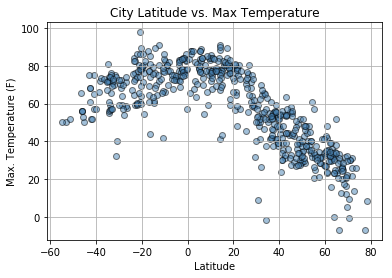

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_images/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

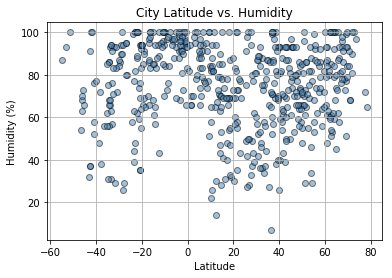

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black", alpha=.5)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_images/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

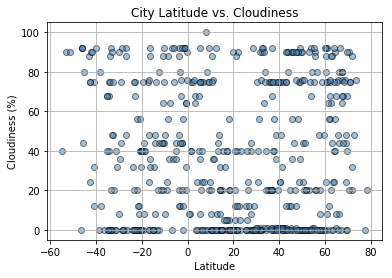

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_images/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

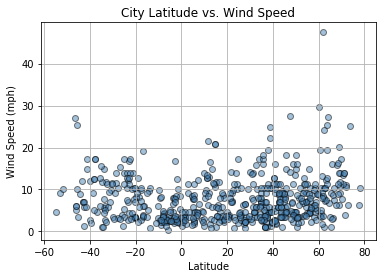

In [81]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black", alpha=.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_images/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()